In [33]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# Download NLTK resources if not already downloaded
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/chenyx/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chenyx/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [34]:
# Load your CSV data
df = pd.read_csv('/Users/chenyx/Desktop/PPOL5203/Final Project/CSV_data/full_data_updated.csv')

In [35]:
# Add custom stopwords
custom_stopwords = set(stopwords.words('english') + ['said', 'say', 'since'] + ['insptect', 'claim'] + ['state'] ) 

us_states = [
    "alabama", "alaska", "arizona", "arkansas", "california", "colorado", "connecticut",
    "delaware", "florida", "georgia", "hawaii", "idaho", "illinois", "indiana", "iowa",
    "kansas", "kentucky", "louisiana", "maine", "maryland", "massachusetts", "michigan",
    "minnesota", "mississippi", "missouri", "montana", "nebraska", "nevada", "new hampshire",
    "new jersey", "new mexico", "new york", "north carolina", "north dakota", "ohio", "oklahoma",
    "oregon", "pennsylvania", "rhode island", "south carolina", "south dakota", "tennessee",
    "texas", "utah", "vermont", "virginia", "washington", "west virginia", "wisconsin", "wyoming"
]
# Add the state names to the custom stopwords
custom_stopwords.update(us_states)

In [36]:
# Write a preprocessing function
def preprocess_text(text):
    
    # tokenization 
    tokens_ = word_tokenize(text)
    
    # Generate a list of tokens after preprocessing
 
    # normalize
    tokens_ = [word.lower() for word in tokens_ if word.isalpha()]

    # stem and stopwords
    tokens_ =  [porter.stem(word) for word in tokens_ if word not in custom_stopwords]
    
    # Return the preprocessed tokens as a string
    return tokens_

In [37]:
porter = PorterStemmer()
df["tokens"] = df["Abstrace"].apply(preprocess_text)

In [38]:
df.head()

,Title,URL,Time,Abstrace,State,tokens
0,This Alaska Mine Would Destroy the World’s Lar...,https://www.nytimes.com/2023/09/24/opinion/ala...,2023-09-24T10:00:08+0000,The state’s governor has asked the Supreme Cou...,Alaska,"[governor, ask, suprem, court, resurrect, wide..."
1,Cleaning Up a Legacy of Pollution on an Alaska...,https://www.nytimes.com/2015/08/04/us/native-a...,2015-08-03T09:00:46+0000,"On St. Lawrence Island, a former military list...",Alaska,"[lawrenc, island, former, militari, listen, po..."
2,Searching for Signs of Lingering Pollution in ...,https://www.nytimes.com/slideshow/2015/08/02/u...,2015-08-03T09:00:38+0000,A group of researchers traveled to St. Lawrenc...,Alaska,"[group, research, travel, lawrenc, island, wit..."
3,Searching for Signs of Lingering Pollution in ...,https://www.nytimes.com/slideshow/2015/08/02/u...,2015-08-03T13:46:18+0000,A group of researchers traveled to St. Lawrenc...,Alaska,"[group, research, travel, lawrenc, island, wit..."
4,National Briefing | West: Alaska: Pollution Se...,https://www.nytimes.com/2001/09/07/us/national...,2001-09-07T05:00:00+0000,national brie,Alaska,"[nation, brie]"


In [26]:
# combine the pre-processed data
# df['Tokenized_Abstract'] = df['tokens'].apply(' '.join)
# df.head()

,Title,URL,Time,Abstrace,State,tokens,Tokenized_Abstract
0,This Alaska Mine Would Destroy the World’s Lar...,https://www.nytimes.com/2023/09/24/opinion/ala...,2023-09-24T10:00:08+0000,The state’s governor has asked the Supreme Cou...,Alaska,"[governor, ask, suprem, court, resurrect, wide...",governor ask suprem court resurrect wide oppos...
1,Cleaning Up a Legacy of Pollution on an Alaska...,https://www.nytimes.com/2015/08/04/us/native-a...,2015-08-03T09:00:46+0000,"On St. Lawrence Island, a former military list...",Alaska,"[lawrenc, island, former, militari, listen, po...",lawrenc island former militari listen post ber...
2,Searching for Signs of Lingering Pollution in ...,https://www.nytimes.com/slideshow/2015/08/02/u...,2015-08-03T09:00:38+0000,A group of researchers traveled to St. Lawrenc...,Alaska,"[group, research, travel, lawrenc, island, wit...",group research travel lawrenc island withstood...
3,Searching for Signs of Lingering Pollution in ...,https://www.nytimes.com/slideshow/2015/08/02/u...,2015-08-03T13:46:18+0000,A group of researchers traveled to St. Lawrenc...,Alaska,"[group, research, travel, lawrenc, island, wit...",group research travel lawrenc island withstood...
4,National Briefing | West: Alaska: Pollution Se...,https://www.nytimes.com/2001/09/07/us/national...,2001-09-07T05:00:00+0000,national brie,Alaska,"[nation, brie]",nation brie


In [39]:
from nltk.probability import FreqDist
from nltk import bigrams
import matplotlib.pyplot as plt

In [40]:
sub = ['California', 'Massachusetts', 'Vermont', 'Wyoming', 'Montana', 'Iowa']
df = df[df['State'].isin(sub)]

In [41]:
# Create an empty DataFrame to store the top bi-grams for each state
top_bi_grams_df = pd.DataFrame(columns=['State', 'Bi-gram', 'Frequency'])

# Calculate and visualize the most frequent bi-grams for each state
for state in df['State'].unique():
    state_data = df[df['State'] == state]
    all_words = [word for abstract in state_data['tokens'] for word in abstract]
    bi_grams = list(bigrams(all_words))
    freq_dist = FreqDist(bi_grams)
    
    # Get the top 10 bi-grams for each state
    top_bi_grams = [(bg, freq) for bg, freq in freq_dist.items() if freq <= 100][:10]
    
    top_bi_grams_df = pd.concat([top_bi_grams_df, pd.DataFrame({'State': [state] * 10,
                                                           'Bi-gram': [bg[0] for bg in top_bi_grams],
                                                           'Frequency': [bg[1] for bg in top_bi_grams]})],
                            ignore_index=True)

In [42]:
top_bi_grams_df.head()

,State,Bi-gram,Frequency
0,California,"(biden, administr)",2
1,California,"(administr, prepar)",1
2,California,"(prepar, toughen)",1
3,California,"(toughen, air)",1
4,California,"(air, qualiti)",25


/var/folders/89/z72pcbj50ygfny4c5_5k_p3r0000gn/T/ipykernel_2311/943487539.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alaska_data['Bi-gram'] = alaska_data['Bi-gram'].apply(lambda x: f"{x[0]} {x[1]}")


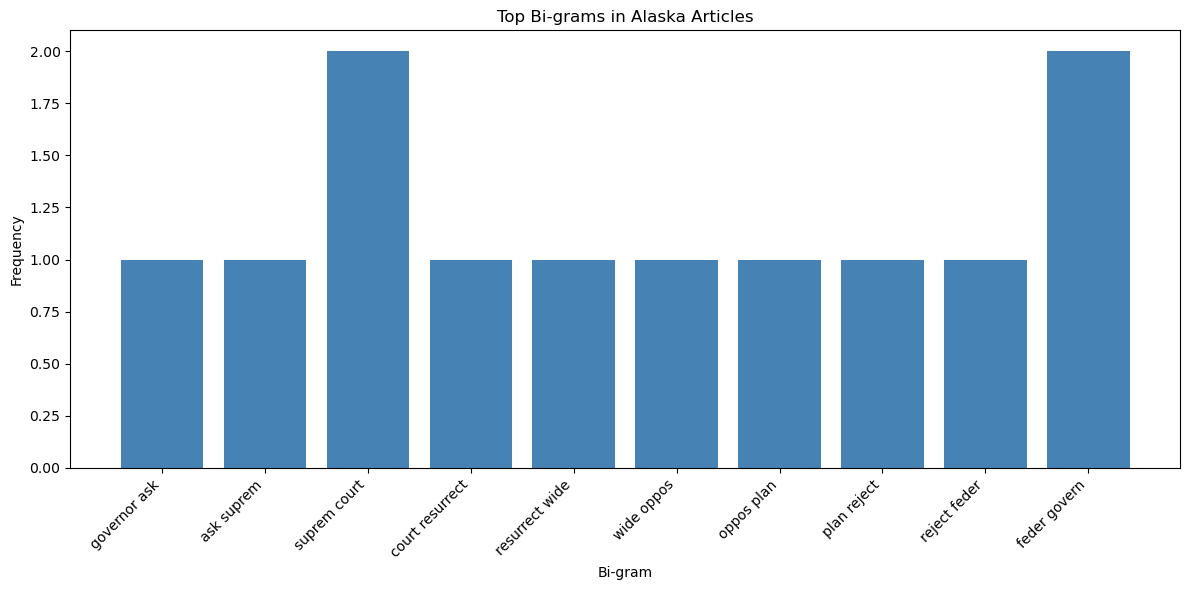

In [62]:
import matplotlib.pyplot as plt

# Filter data for the state "Alaska"
alaska_data = top_bi_grams_df[top_bi_grams_df['State'] == 'Alaska']

# Convert tuples in the 'Bi-gram' column to strings
alaska_data['Bi-gram'] = alaska_data['Bi-gram'].apply(lambda x: f"{x[0]} {x[1]}")

# Plot the frequency bar plot using matplotlib
plt.figure(figsize=(12, 6))
plt.bar(alaska_data['Bi-gram'], alaska_data['Frequency'], color='steelblue')
plt.xlabel('Bi-gram')
plt.ylabel('Frequency')
plt.title('Top Bi-grams in Alaska Articles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


/var/folders/89/z72pcbj50ygfny4c5_5k_p3r0000gn/T/ipykernel_1643/3679699080.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  california_data['Bi-gram'] = california_data['Bi-gram'].apply(lambda x: f"{x[0]} {x[1]}")


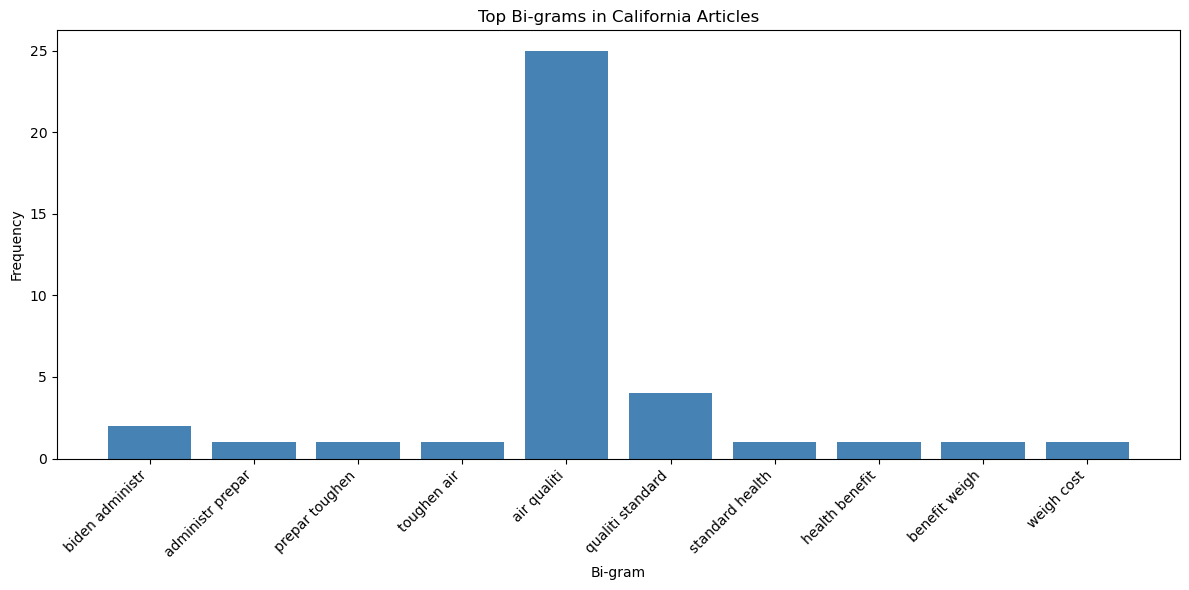

In [49]:
# Filter data for the state "Alaska"
california_data = top_bi_grams_df[top_bi_grams_df['State'] == 'California']

# Convert tuples in the 'Bi-gram' column to strings
california_data['Bi-gram'] = california_data['Bi-gram'].apply(lambda x: f"{x[0]} {x[1]}")

# Plot the frequency bar plot using matplotlib
plt.figure(figsize=(12, 6))
plt.bar(california_data['Bi-gram'], california_data['Frequency'], color='steelblue')
plt.xlabel('Bi-gram')
plt.ylabel('Frequency')
plt.title('Top Bi-grams in California Articles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Combine tokenized words into sentences for each state
df_grouped = df.groupby('State')['tokens'].apply(lambda x: ' '.join([word for abstract in x for word in abstract])).reset_index(name='Processed_Text')

# Use TF-IDF Vectorizer to convert text into numerical vectors
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df_grouped['Processed_Text'])

# Compute cosine similarity between states
similarity_matrix = cosine_similarity(tfidf_matrix)

# Display the similarity matrix
similarity_df = pd.DataFrame(similarity_matrix, index=df_grouped['State'], columns=df_grouped['State'])
print(similarity_df)

State          California      Iowa  Massachusetts   Montana   Vermont  \
State                                                                    
California       1.000000  0.256020       0.657336  0.292149  0.540123   
Iowa             0.256020  1.000000       0.222212  0.132417  0.206927   
Massachusetts    0.657336  0.222212       1.000000  0.243894  0.593254   
Montana          0.292149  0.132417       0.243894  1.000000  0.152413   
Vermont          0.540123  0.206927       0.593254  0.152413  1.000000   
Wyoming          0.380011  0.163754       0.318848  0.286133  0.208797   

State           Wyoming  
State                    
California     0.380011  
Iowa           0.163754  
Massachusetts  0.318848  
Montana        0.286133  
Vermont        0.208797  
Wyoming        1.000000  


In [44]:
similarity_df.columns

Index(['California', 'Iowa', 'Massachusetts', 'Montana', 'Vermont', 'Wyoming'], dtype='object', name='State')

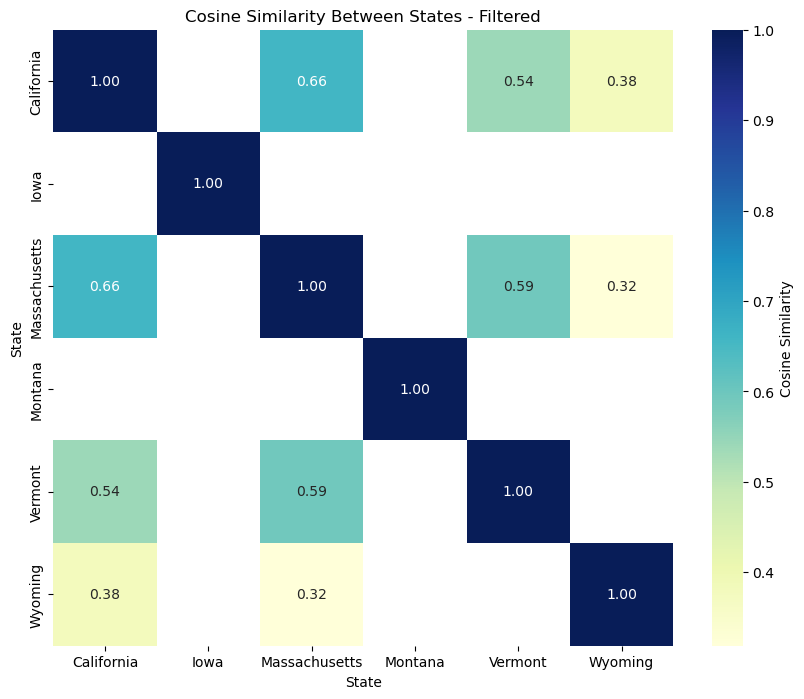

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the threshold for similarity
threshold = 0.3

# Filter the similarity matrix to include only pairs with similarity above the threshold
similar_pairs = similarity_df[similarity_df > threshold]

# Plot a heatmap of the similar pairs
plt.figure(figsize=(10, 8))
sns.heatmap(similar_pairs, cmap="YlGnBu", annot=True, fmt=".2f", cbar_kws={'label': 'Cosine Similarity'})
plt.title('Cosine Similarity Between States - Filtered')
plt.savefig('cosine_similarity_matrix_screened.jpg')
plt.show()


In [48]:
# Filter top bigrams for Massachusetts, California, and Vermont
selected_states = ['Massachusetts', 'California', 'Vermont']
selected_bigrams_df = top_bi_grams_df[top_bi_grams_df['State'].isin(selected_states)]

# Display the top 10 bigrams for each state
for state in selected_states:
    state_bigrams = selected_bigrams_df[selected_bigrams_df['State'] == state]['Bi-gram'].tolist()
    print(f'Top 10 bigrams for {state}: {state_bigrams}')

# Identify overlapping bigrams
overlapping_bigrams = selected_bigrams_df.groupby('Bi-gram')['State'].count().reset_index(name='Count')
overlapping_bigrams = overlapping_bigrams[overlapping_bigrams['Count'] > 1]['Bi-gram'].tolist()

print('\nOverlapping Bigrams:')
print(overlapping_bigrams)


Top 10 bigrams for Massachusetts: [('nine', 'northastern'), ('northastern', 'state'), ('state', 'file'), ('file', 'legal'), ('legal', 'challeng'), ('challeng', 'new'), ('new', 'rule'), ('rule', 'power'), ('power', 'plant'), ('plant', 'industri')]
Top 10 bigrams for California: [('biden', 'administr'), ('administr', 'prepar'), ('prepar', 'toughen'), ('toughen', 'air'), ('air', 'qualiti'), ('qualiti', 'standard'), ('standard', 'health'), ('health', 'benefit'), ('benefit', 'weigh'), ('weigh', 'cost')]
Top 10 bigrams for Vermont: [('nine', 'northastern'), ('northastern', 'state'), ('state', 'file'), ('file', 'legal'), ('legal', 'challeng'), ('challeng', 'new'), ('new', 'rule'), ('rule', 'power'), ('power', 'plant'), ('plant', 'industri')]

Overlapping Bigrams:
[('challeng', 'new'), ('file', 'legal'), ('legal', 'challeng'), ('new', 'rule'), ('nine', 'northastern'), ('northastern', 'state'), ('plant', 'industri'), ('power', 'plant'), ('rule', 'power'), ('state', 'file')]


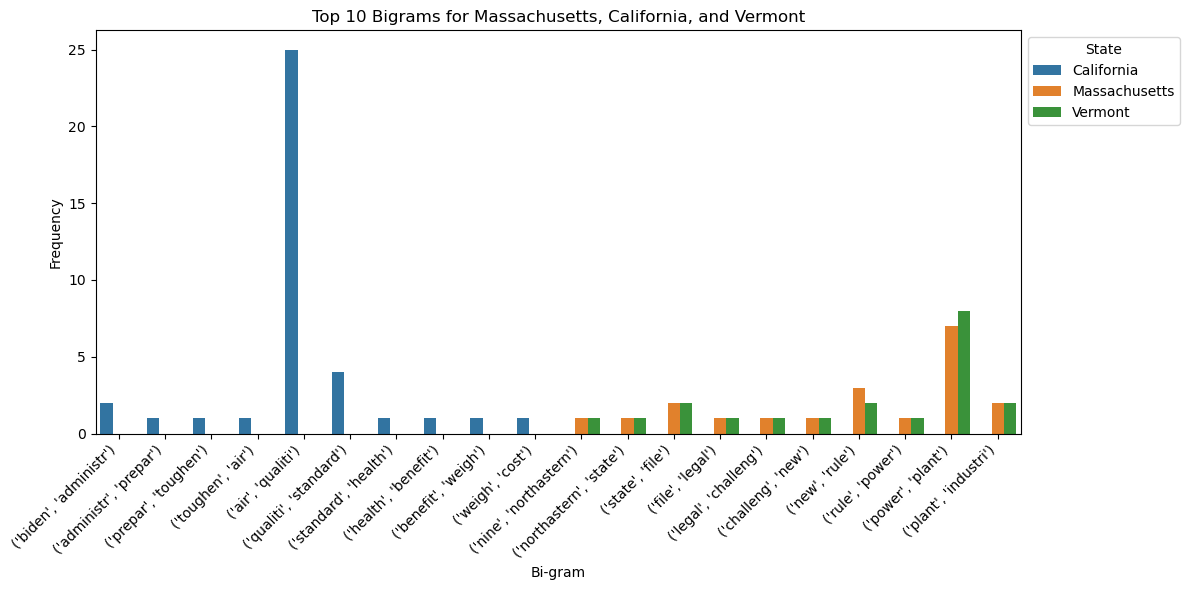

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter top bigrams for Massachusetts, California, and Vermont
selected_states = ['Massachusetts', 'California', 'Vermont']
selected_bigrams_df = top_bi_grams_df[top_bi_grams_df['State'].isin(selected_states)]

# Create a bar plot to show the frequency of overlapping bigrams
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='Bi-gram', y='Frequency', hue='State', data=selected_bigrams_df)
bar_plot.set(xlabel='Bi-gram', ylabel='Frequency')
bar_plot.set(title='Top 10 Bigrams for Massachusetts, California, and Vermont')
bar_plot.legend(title='State', bbox_to_anchor=(1, 1))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()


import matplotlib.pyplot as plt

# Extract top bigrams for California
california_bigrams = set(top_bi_grams_df[top_bi_grams_df['State'] == 'California']['Bi-gram'])

# Extract top bigrams for Massachusetts
massachusetts_bigrams = set(top_bi_grams_df[top_bi_grams_df['State'] == 'Massachusetts']['Bi-gram'])

# Find common bigrams
common_bigrams = california_bigrams.intersection(massachusetts_bigrams)

# Check if there are common bigrams
if not common_bigrams:
    print("No common bigrams found.")
else:
    # Filter the top bigrams DataFrame to include only common bigrams
    common_bigrams_df = top_bi_grams_df[top_bi_grams_df['Bi-gram'].isin(common_bigrams)]

    # Plot the common bigrams
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Bi-gram', y='Frequency', hue='State', data=common_bigrams_df)
    plt.title('Common Bigrams between California and Massachusetts')
    plt.xlabel('Bi-gram')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.legend(title='State')
    plt.show()


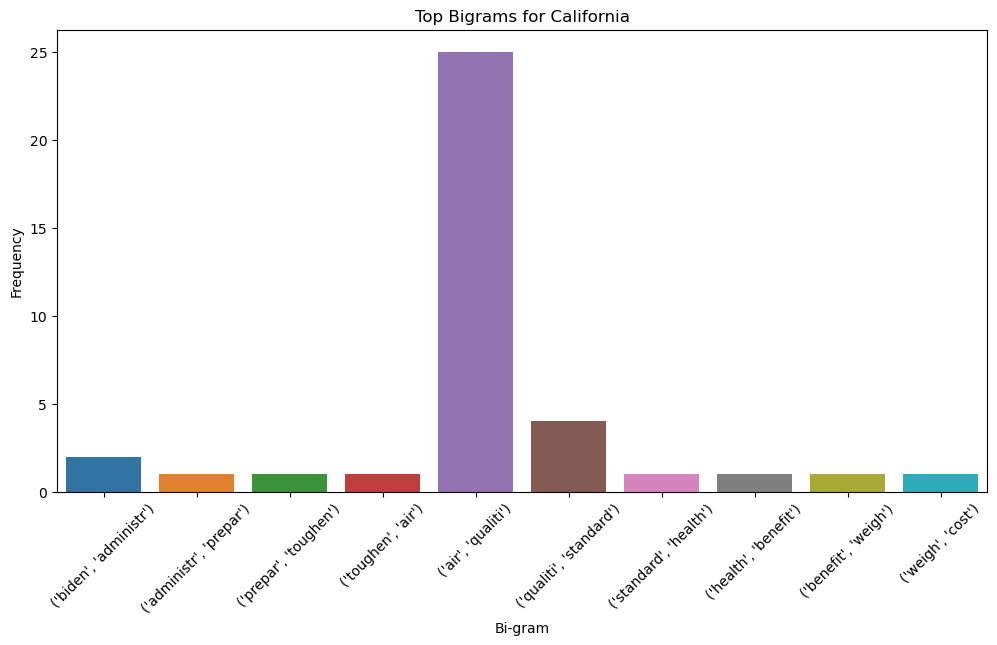

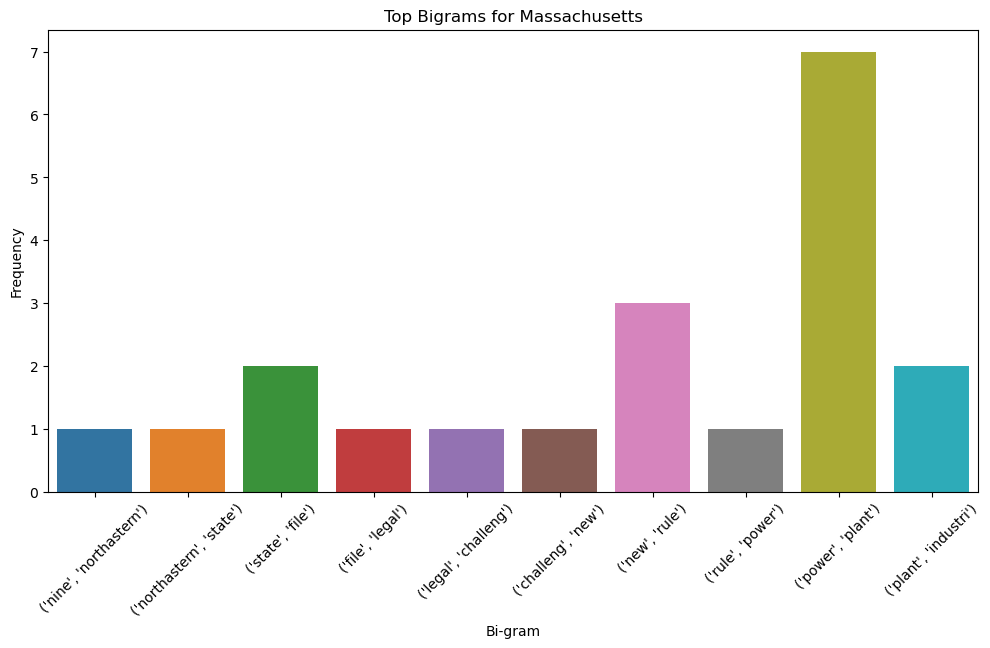

In [73]:
# Filter the top bigrams DataFrame for California
california_top_bigrams = top_bi_grams_df[top_bi_grams_df['State'] == 'California']

# Filter the top bigrams DataFrame for Massachusetts
massachusetts_top_bigrams = top_bi_grams_df[top_bi_grams_df['State'] == 'Massachusetts']

# Plot the top bigrams for California
plt.figure(figsize=(12, 6))
sns.barplot(x='Bi-gram', y='Frequency', data=california_top_bigrams)
plt.title('Top Bigrams for California')
plt.xlabel('Bi-gram')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.savefig('top_bigrams_california.png')
plt.show()

# Plot the top bigrams for Massachusetts
plt.figure(figsize=(12, 6))
sns.barplot(x='Bi-gram', y='Frequency', data=massachusetts_top_bigrams)
plt.title('Top Bigrams for Massachusetts')
plt.xlabel('Bi-gram')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.savefig('top_bigrams_massachusetts.png')
plt.show()


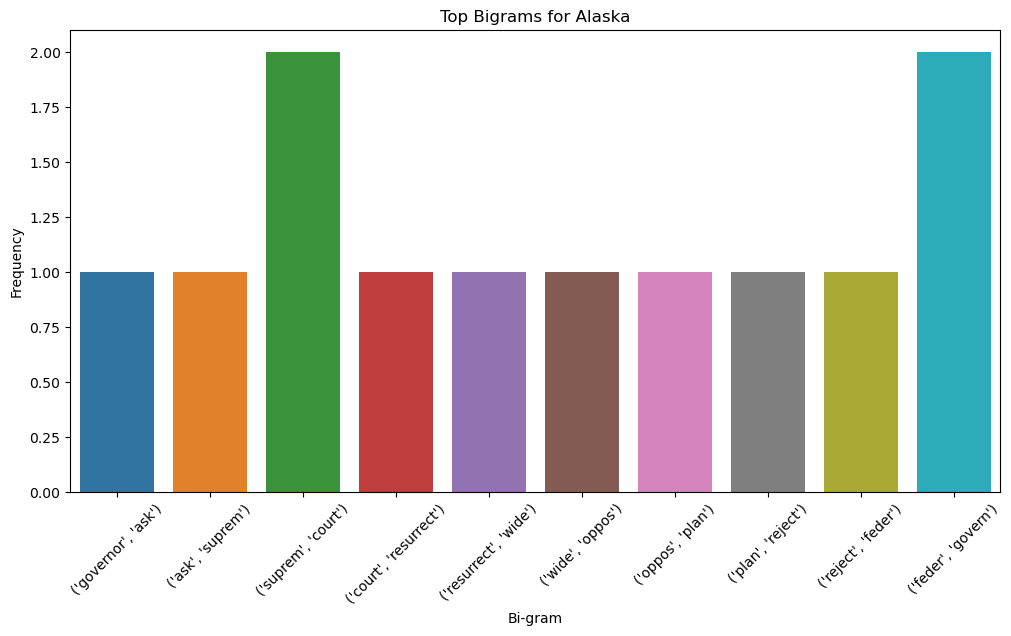

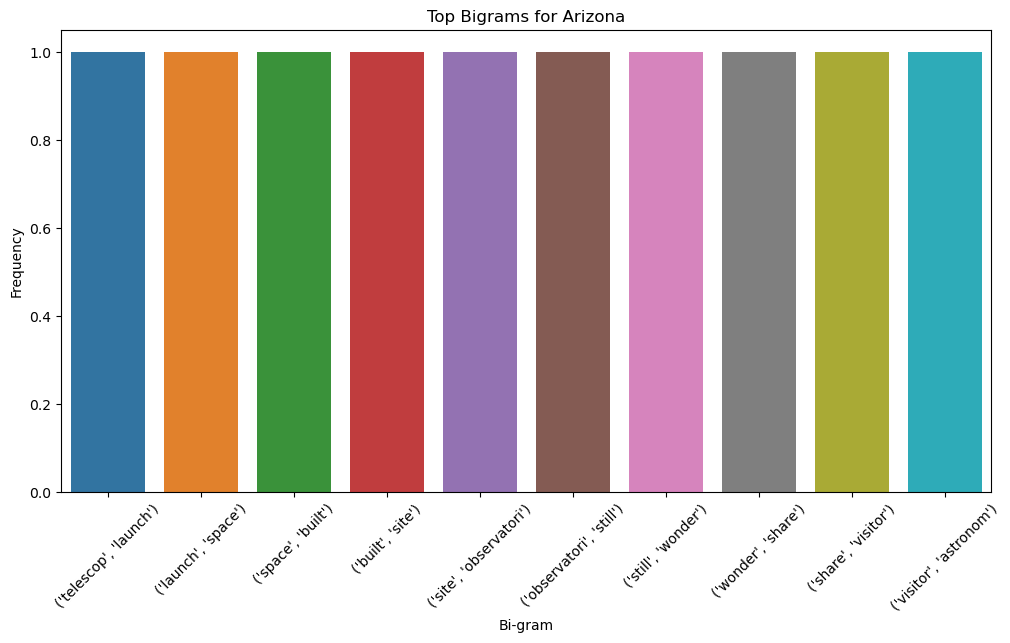

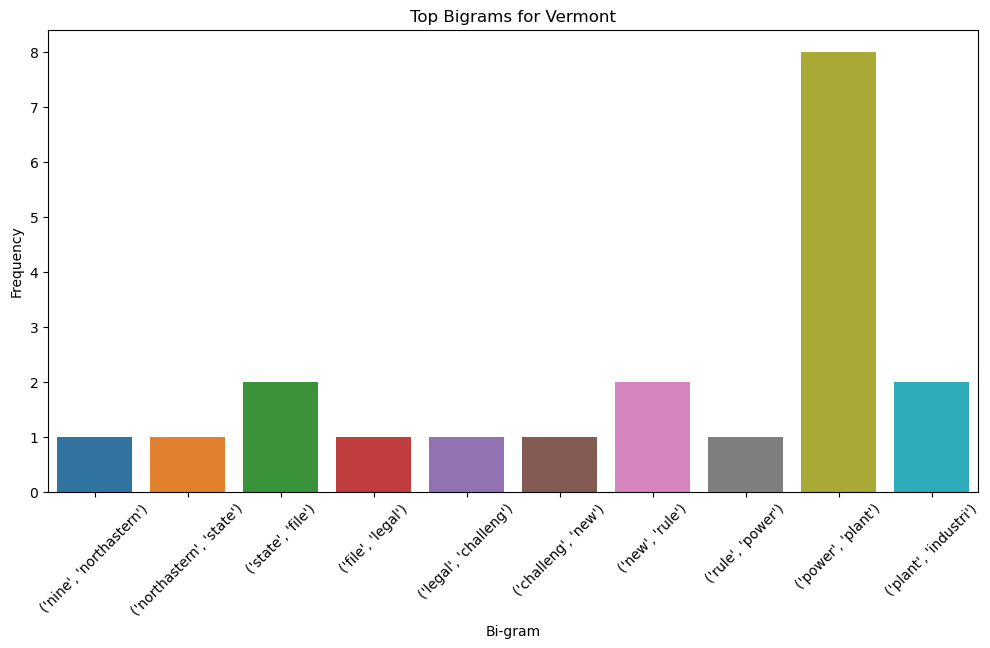

In [72]:
# Filter the top bigrams DataFrame for California
alaska_top_bigrams = top_bi_grams_df[top_bi_grams_df['State'] == 'Alaska']

# Filter the top bigrams DataFrame for Massachusetts
arizona_top_bigrams = top_bi_grams_df[top_bi_grams_df['State'] == 'Arizona']

vermont_top_bigrams = top_bi_grams_df[top_bi_grams_df['State'] == 'Vermont']

# Plot the top bigrams for California
plt.figure(figsize=(12, 6))
sns.barplot(x='Bi-gram', y='Frequency', data=alaska_top_bigrams)
plt.title('Top Bigrams for Alaska')
plt.xlabel('Bi-gram')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Plot the top bigrams for Massachusetts
plt.figure(figsize=(12, 6))
sns.barplot(x='Bi-gram', y='Frequency', data=arizona_top_bigrams)
plt.title('Top Bigrams for Arizona')
plt.xlabel('Bi-gram')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Plot the top bigrams for Massachusetts
plt.figure(figsize=(12, 6))
sns.barplot(x='Bi-gram', y='Frequency', data=vermont_top_bigrams)
plt.title('Top Bigrams for Vermont')
plt.xlabel('Bi-gram')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [50]:
# Set a threshold for similarity
threshold = 0.40

# Find pairs with similarity above the threshold
similar_states = []
for i in range(len(similarity_df.columns)):
    for j in range(i + 1, len(similarity_df.columns)):
        state_pair = (similarity_df.columns[i], similarity_df.columns[j])
        similarity_score = similarity_df.iloc[i, j]

        if similarity_score > threshold:
            similar_states.append({'State1': state_pair[0], 'State2': state_pair[1], 'Similarity': similarity_score})

# Create a DataFrame from the list of similar states
similar_states_df = pd.DataFrame(similar_states)

# Display the DataFrame
print(similar_states_df)

            State1         State2  Similarity
0           Alaska     California    0.413232
1           Alaska      Louisiana    0.401170
2           Alaska          Texas    0.417968
3       California    Connecticut    0.487691
4       California  Massachusetts    0.588255
5       California     New Jersey    0.422934
6       California         Oregon    0.499719
7       California          Texas    0.528767
8       California        Vermont    0.476724
9      Connecticut  Massachusetts    0.499161
10     Connecticut     New Jersey    0.483379
11         Georgia      Tennessee    0.474661
12        Kentucky      Tennessee    0.411981
13       Louisiana          Texas    0.459855
14           Maine  Massachusetts    0.420668
15   Massachusetts          Texas    0.409335
16   Massachusetts        Vermont    0.531155
17      New Jersey   Pennsylvania    0.408622
18      New Jersey       Virginia    0.453692
19  North Carolina      Tennessee    0.485923
20    Pennsylvania          Texas 

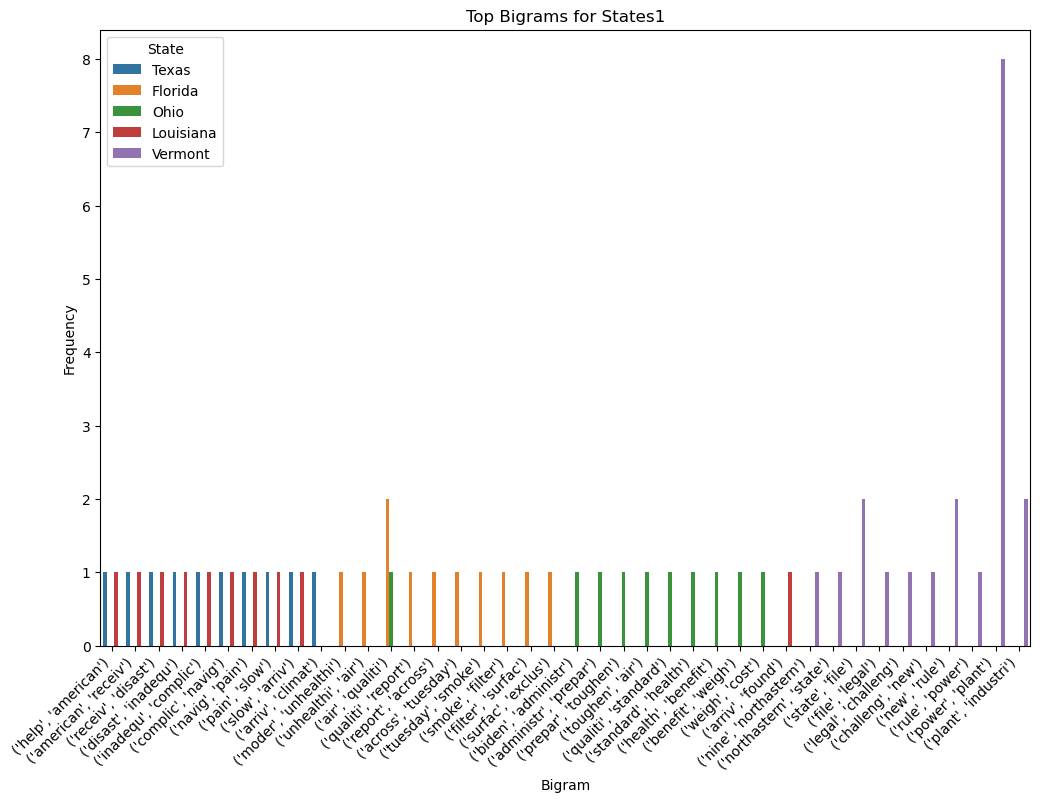

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns


states1 = ['Alaska','California','Texas']

states1_df = top_bi_grams_df[top_bi_grams_df['State'].isin(states1)]

# Create a bar plot for the top bigrams using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(data=low_5_df, x='Bi-gram', y='Frequency', hue='State')
plt.title('Top Bigrams for States1')
plt.xlabel('Bigram')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.legend(title='State')

# Show the plot
plt.show()

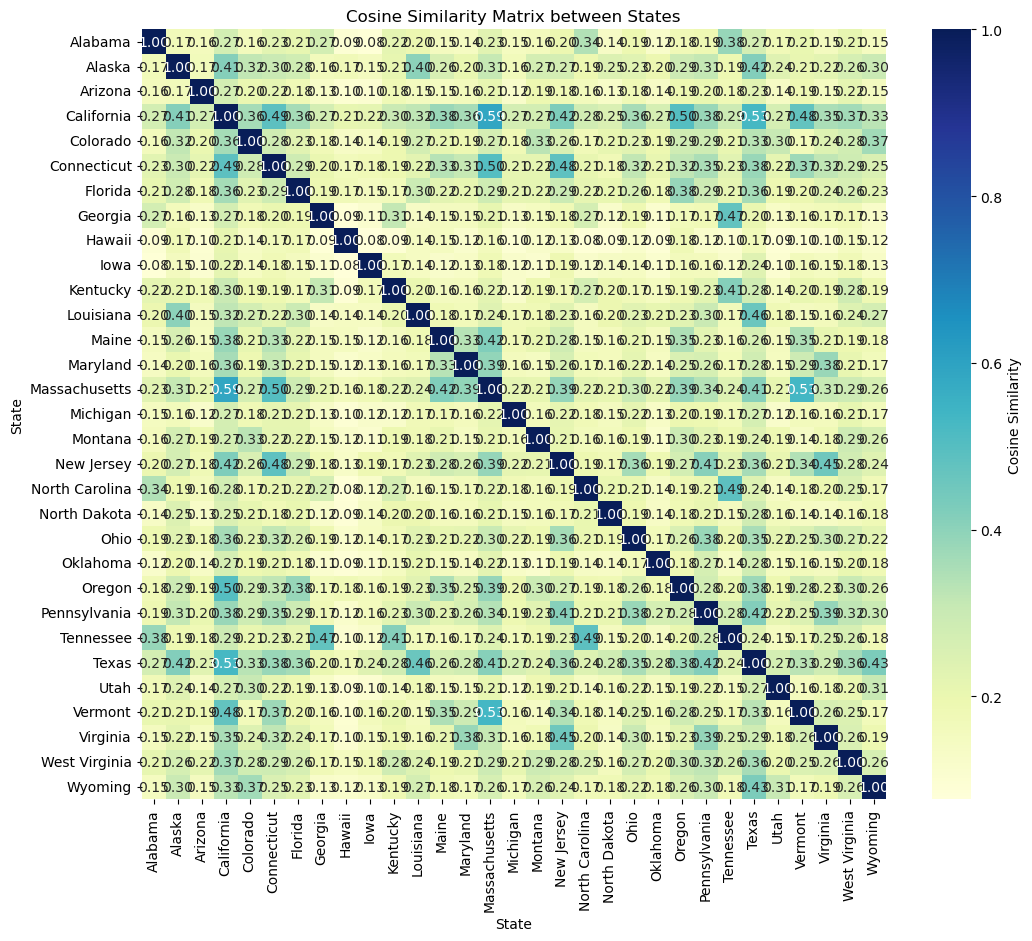

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming similarity_df is the DataFrame containing cosine similarity values
plt.figure(figsize=(12, 10))
sns.heatmap(similarity_df, cmap="YlGnBu", annot=True, fmt=".2f", cbar_kws={'label': 'Cosine Similarity'})
plt.title('Cosine Similarity Matrix between States')
plt.savefig('cosine_similarity_matrix.jpg')
plt.show()

In [34]:
# Find the top N similar states for each state
top_n = 3  # You can adjust this number based on your preference

# Create a DataFrame to store the results
top_similar_states_df = pd.DataFrame(columns=['State', 'Similar State', 'Cosine Similarity'])

# Iterate over each state
for state in similarity_df.index:
    # Calculate similarity with all other states
    state_similarities = similarity_df.loc[state].sort_values(ascending=False)
    
    # Exclude the state itself from the top similarities
    top_similar_states = state_similarities.drop(state).head(top_n)
    
    # Append the results to the DataFrame
    top_similar_states_df = pd.concat([top_similar_states_df, top_similar_states.reset_index().assign(State=state)], ignore_index=True)

# Sort the DataFrame by cosine similarity
top_similar_states_df = top_similar_states_df.sort_values(by='Cosine Similarity', ascending=False)

# Display the top similar states for each state
print("Top {} Similar States for Each State:".format(top_n))
print(top_similar_states_df)


Top 3 Similar States for Each State:
            State Similar State Cosine Similarity   Alabama    Alaska  \
0         Alabama           NaN               NaN  0.383681       NaN   
1         Alabama           NaN               NaN  0.341191       NaN   
2         Alabama           NaN               NaN  0.272952       NaN   
3          Alaska           NaN               NaN       NaN  0.417968   
4          Alaska           NaN               NaN       NaN  0.413232   
..            ...           ...               ...       ...       ...   
88  West Virginia           NaN               NaN       NaN       NaN   
89  West Virginia           NaN               NaN       NaN       NaN   
90        Wyoming           NaN               NaN       NaN       NaN   
91        Wyoming           NaN               NaN       NaN       NaN   
92        Wyoming           NaN               NaN       NaN       NaN   

    Arizona  California  Colorado  Connecticut  Florida  ...  Oklahoma  \
0       NaN 

In [42]:
# Set the similarity threshold values
min_similarity = 0.40
max_similarity = 1.00

# Filter the similarity matrix based on the threshold values
filtered_similarity_df = similarity_df[(similarity_df > min_similarity) & (similarity_df < max_similarity)]

# Display the filtered similarity matrix
print("Filtered Similarity Matrix:")
print(filtered_similarity_df)


Filtered Similarity Matrix:
State           Alabama    Alaska  Arizona  California  Colorado  Connecticut  \
State                                                                           
Alabama             NaN       NaN      NaN         NaN       NaN          NaN   
Alaska              NaN       NaN      NaN    0.413232       NaN          NaN   
Arizona             NaN       NaN      NaN         NaN       NaN          NaN   
California          NaN  0.413232      NaN    1.000000       NaN     0.487691   
Colorado            NaN       NaN      NaN         NaN       1.0          NaN   
Connecticut         NaN       NaN      NaN    0.487691       NaN          NaN   
Florida             NaN       NaN      NaN         NaN       NaN          NaN   
Georgia             NaN       NaN      NaN         NaN       NaN          NaN   
Hawaii              NaN       NaN      NaN         NaN       NaN          NaN   
Iowa                NaN       NaN      NaN         NaN       NaN          NaN   


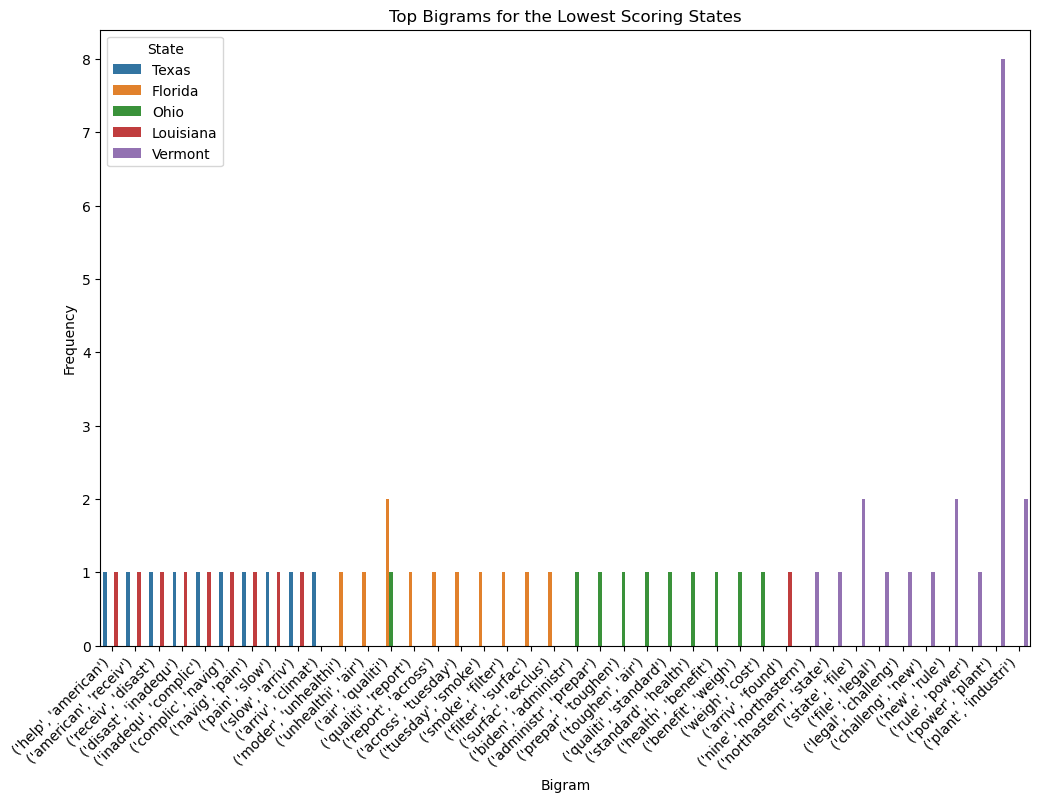

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame for Alabama, North Carolina, and Tennessee
low_5_states = ['Louisiana', 'Florida', 'Ohio', 'Texas', 'Vermont']
low_5_df = top_bi_grams_df[top_bi_grams_df['State'].isin(low_5_states)]

# Create a bar plot for the top bigrams using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(data=low_5_df, x='Bi-gram', y='Frequency', hue='State')
plt.title('Top Bigrams for the Lowest Scoring States')
plt.xlabel('Bigram')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.legend(title='State')

# Show the plot
plt.show()

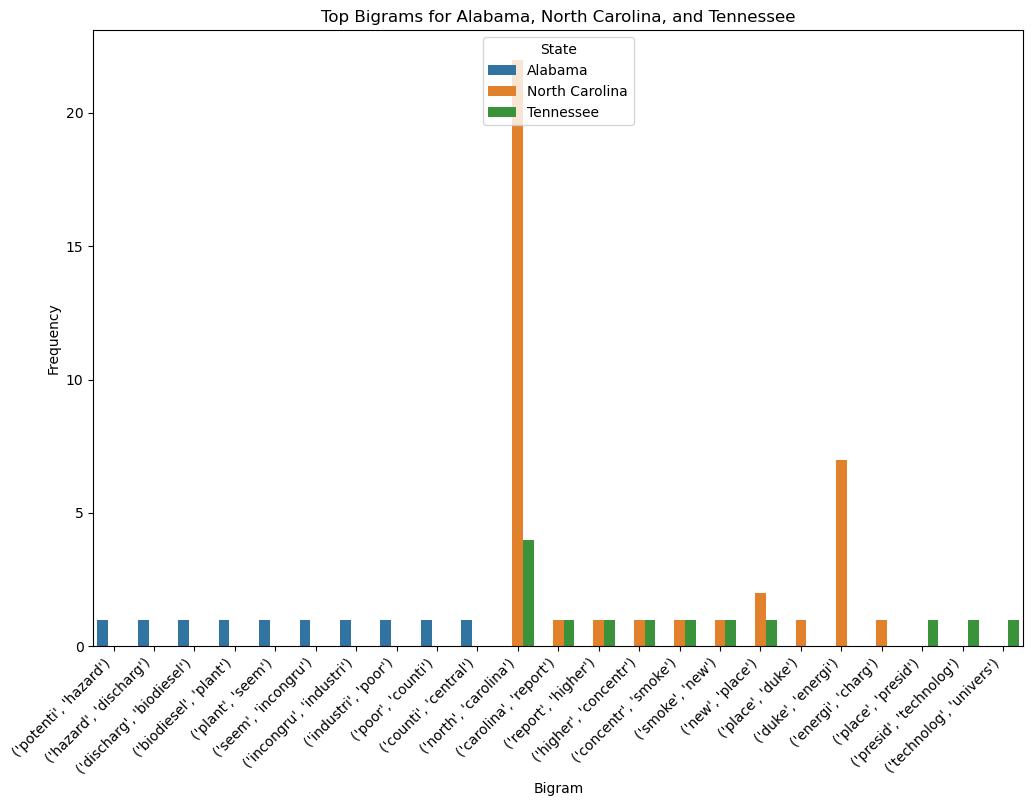

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame for Alabama, North Carolina, and Tennessee
target_states = ['Alabama', 'North Carolina', 'Tennessee']
filtered_top_bi_grams_df = top_bi_grams_df[top_bi_grams_df['State'].isin(target_states)]

# Create a bar plot for the top bigrams using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(data=filtered_top_bi_grams_df, x='Bi-gram', y='Frequency', hue='State')
plt.title('Top Bigrams for Alabama, North Carolina, and Tennessee')
plt.xlabel('Bigram')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.legend(title='State')

# Show the plot
plt.show()


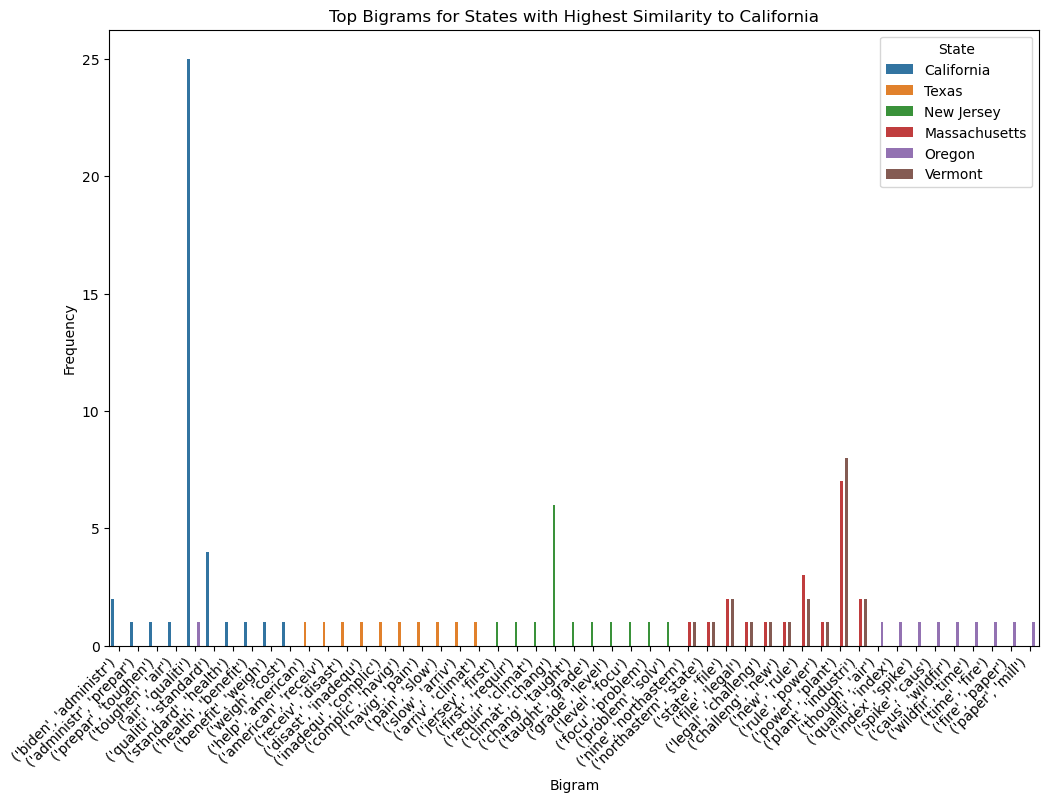

In [39]:
# Filter the DataFrame for Alabama, North Carolina, and Tennessee
CA_similar_states = ['California', 'Massachusetts', 'New Jersey','Oregon', 'Texas', 'Vermont']
CA_filtered_top_bi_grams_df = top_bi_grams_df[top_bi_grams_df['State'].isin(CA_similar_states)]

# Create a bar plot for the top bigrams using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(data=CA_filtered_top_bi_grams_df, x='Bi-gram', y='Frequency', hue='State')
plt.title('Top Bigrams for States with Highest Similarity to California')
plt.xlabel('Bigram')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.legend(title='State')

# Show the plot
plt.show()

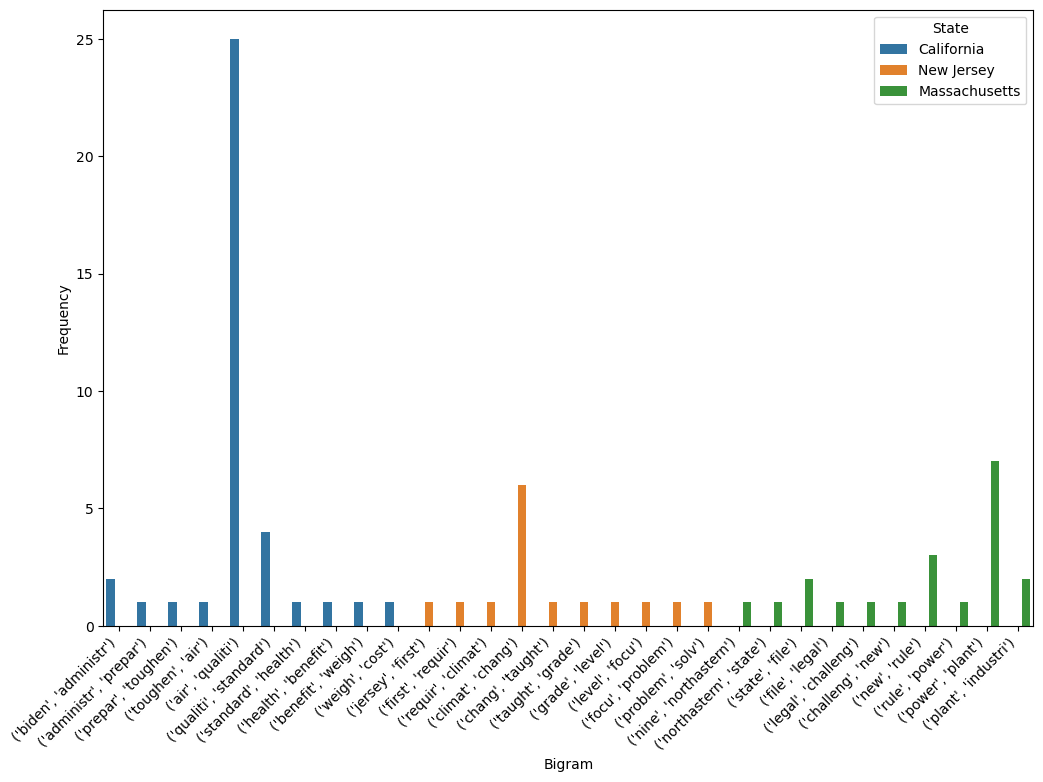

In [40]:
# Filter the DataFrame for Alabama, North Carolina, and Tennessee
CA_similar_states_1 = ['California', 'Massachusetts', 'New Jersey']
CA_filtered_top_bi_grams_df_1 = top_bi_grams_df[top_bi_grams_df['State'].isin(CA_similar_states_1)]

# Create a bar plot for the top bigrams using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(data=CA_filtered_top_bi_grams_df_1, x='Bi-gram', y='Frequency', hue='State')
plt.xlabel('Bigram')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.legend(title='State')

# Show the plot
plt.show()

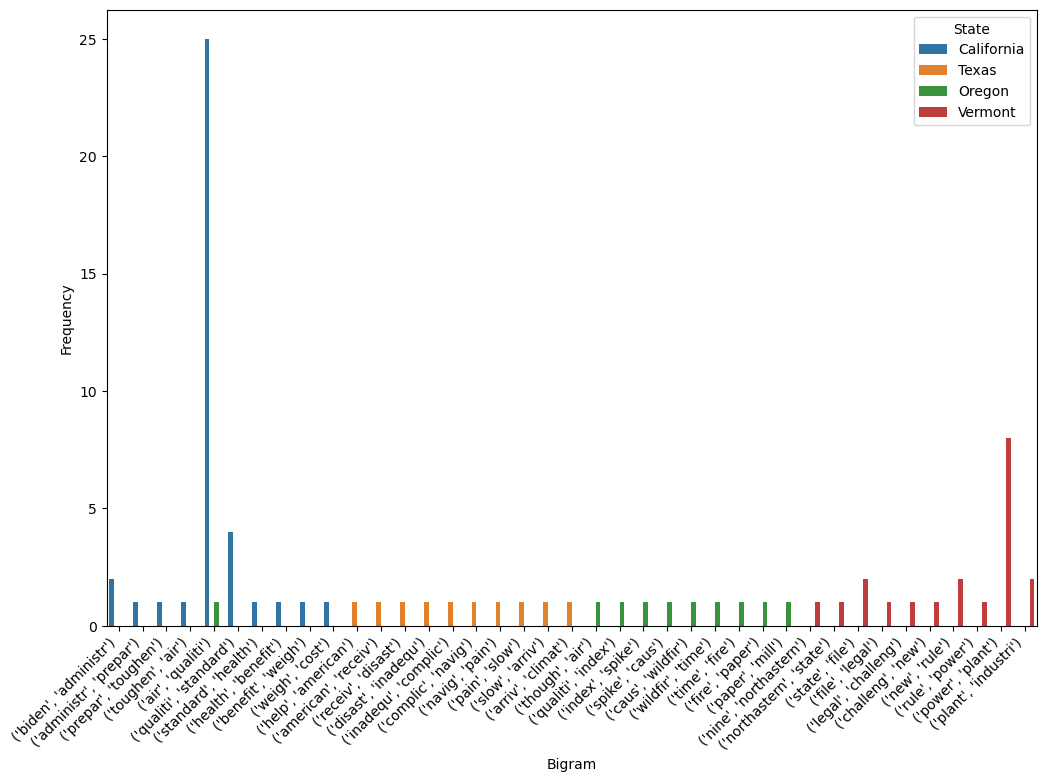

In [41]:
# Filter the DataFrame for Alabama, North Carolina, and Tennessee
CA_similar_states_2 = ['California', 'Oregon', 'Texas', 'Vermont']
CA_filtered_top_bi_grams_df_2 = top_bi_grams_df[top_bi_grams_df['State'].isin(CA_similar_states_2)]

# Create a bar plot for the top bigrams using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(data=CA_filtered_top_bi_grams_df_2, x='Bi-gram', y='Frequency', hue='State')
plt.xlabel('Bigram')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.legend(title='State')

# Show the plot
plt.show()